Linear regression 을 학습하며, 기계학습의 원리 및 TensorFlow 를 익히는 notebook 입니다.

**라이브러리 Import 하기**

In [401]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import matplotlib.pyplot as plt

**X and Y data (given)**

In [402]:
x_train = [1, 2, 3]

y_train = [2+0.1, 4-0.3, 6+0.15] # 약간의 noise 추가

# 다음의 것들도 해보시오
#y_train = [2, 4, 6] # 그냥 x_train 에 2배 곱해서 생성
#y_train = [3, 5, 7]

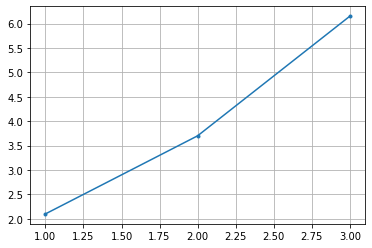

In [403]:
plt.plot(x_train, y_train,'.-')
plt.grid()

In [404]:
x_train = [1, 2, 3, 4, 5]
#y_train = [2, 4, 6, 8, 10] # 약간의 noise 추가
#y = 2x
y_train = [3, 5, 7, 9, 11]
#y = 2x + 1

signal_length = len(x_train)
y_noise = np.random.normal(0, 1, signal_length)

y_train = y_train + y_noise

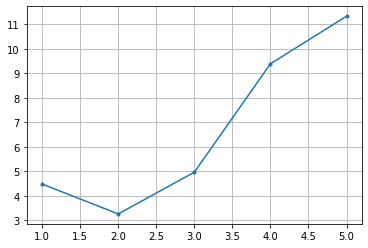

In [405]:
plt.plot(x_train, y_train,'.-')
plt.grid()

In [406]:
#x_train = [1, 2, 3]
#y_train = [3, 5, 7] # 약간의 noise 추가
#signal_length = len(x_train)
#y_noise = np.random.normal(0, 1, signal_length)

#y_train = y_train + y_noise

In [407]:
#plt.plot(x_train, y_train,'.-')
#plt.grid()

**Initialization**

In [408]:
useRandom = False

In [409]:
if useRandom:
  W = tf.Variable(tf.random_normal([1]), name='weight') #초기값 랜덤 생성
  b = tf.Variable(tf.random_normal([1]), name='bias')
else:
  w0 = 6.0;
  b0 = 4.0;

  W = tf.Variable(w0*tf.ones([1]), name='weight')
  b = tf.Variable(b0*tf.ones([1]), name='bias')

**Our hypothesis XW+b**
$$ H(x)=Wx + b $$

In [410]:
hypothesis = x_train * W + b # W는 기울기, b는 절편bias

**cost/loss function 정의하기**

* loss of one training example :$$ loss = \mathcal{L}(\hat{y}, y) = (\hat y^{(i)} - y^{(i)})^2 \tag{1} $$

In [411]:
loss = tf.reduce_mean(tf.square(hypothesis - y_train))

**Optimizer**

In [412]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01) #w, b를 결정을 해주는,변화시켜가는 녀석
train = optimizer.minimize(loss) #loss 뺀거 다 더한거 평균낸거 최소화

**Launch the graph in a session**

In [413]:
sess = tf.Session()

**Initializes global variables in the graph.**

In [414]:
sess.run(tf.global_variables_initializer()) #초기화

In [415]:
nb_epoch = 3001
vloss = [] #empty list
vb = [] #empty list
vw = [] #empty list

for step in range(nb_epoch):
    sess.run(train)
    loss1 = sess.run(loss)
    vloss.append(loss1)
    w1 = sess.run(W)[0] # 기울기
    b1 = sess.run(b)[0] # bias    
    vw.append(w1)
    vb.append(b1)
        

    if step % 100 == 0: # 100번마다
        
        print(step,'\t', loss1,'\t', w1,'\t', b1)

0 	 157.67198 	 4.9201727 	 3.6936588
100 	 2.1834967 	 1.5882716 	 2.1571453
200 	 2.0044627 	 1.7007779 	 1.7509618
300 	 1.9135193 	 1.7809632 	 1.4614671
400 	 1.8673226 	 1.8381128 	 1.2551392
500 	 1.8438566 	 1.8788443 	 1.108086
600 	 1.8319366 	 1.9078743 	 1.0032779
700 	 1.8258814 	 1.9285648 	 0.92857903
800 	 1.822806 	 1.943311 	 0.8753403
900 	 1.821243 	 1.953821 	 0.8373959
1000 	 1.8204495 	 1.9613117 	 0.810352
1100 	 1.8200462 	 1.9666504 	 0.7910776
1200 	 1.8198416 	 1.9704555 	 0.7773402
1300 	 1.8197377 	 1.9731673 	 0.76754946
1400 	 1.8196847 	 1.9751 	 0.7605715
1500 	 1.8196579 	 1.9764776 	 0.7555982
1600 	 1.8196446 	 1.9774594 	 0.75205344
1700 	 1.8196377 	 1.9781592 	 0.74952704
1800 	 1.8196341 	 1.9786578 	 0.74772686
1900 	 1.8196319 	 1.9790132 	 0.7464437
2000 	 1.8196312 	 1.9792665 	 0.7455291
2100 	 1.8196306 	 1.9794471 	 0.7448773
2200 	 1.8196304 	 1.9795756 	 0.74441284
2300 	 1.8196304 	 1.9796675 	 0.74408174
2400 	 1.8196304 	 1.979733 	 

Text(0, 0.5, 'loss')

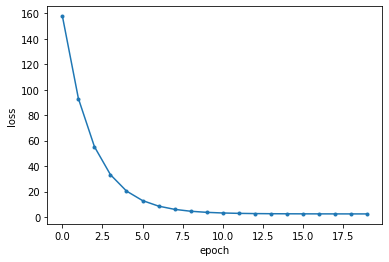

In [416]:
plt.plot(vloss[:20],'.-')
plt.xlabel('epoch')
plt.ylabel('loss')

**TODO:w, b의 epoch에 따른 변화 그래프 넣기!**

Text(0, 0.5, 'W')

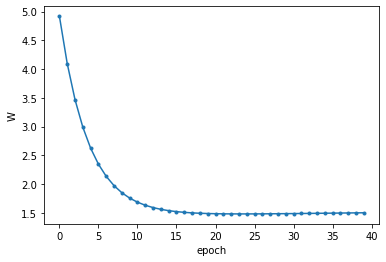

In [417]:
plt.plot(vw[:40],'.-')
plt.xlabel('epoch')
plt.ylabel('W')

Text(0, 0.5, 'b')

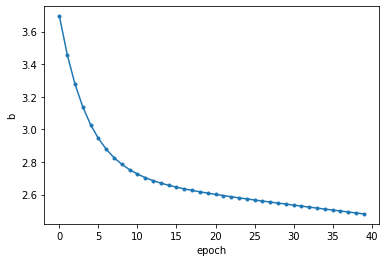

In [418]:
plt.plot(vb[:40],'.-')
plt.xlabel('epoch')
plt.ylabel('b')

**학습완료**

In [419]:
w1 = sess.run(W)[0] # 기울기
b1 = sess.run(b)[0] # bias

**출력해보기**

In [420]:
print(w1, b1)

1.9798741 0.7433361


In [421]:
strl = 'y = ' + str(w1) +'x + ' + str(b1)
print(strl)

y = 1.9798741x + 0.7433361


Text(0.5, 1.0, 'y = 1.183659x + 2.4232016')

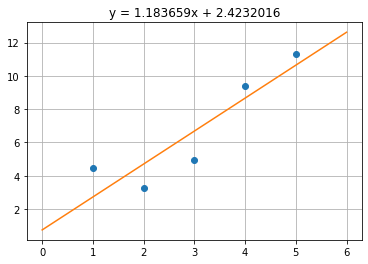

In [422]:
plt.figure(figsize=(6,4)) # figsize를 바꾸어보세요
plt.plot(x_train, y_train,'o') #train data 그리기

# 직선 그래프를 그리기 위한 코드
# 그래프의 x좌표를 일정 간격으로 설정함
x1 = np.linspace(np.min(x_train)-1, np.max(x_train)+1)
y1 = w1*x1 + b1
plt.plot(x1, y1)

plt.grid() # 격자
#plt.axis((np.min(x_train) - 1, np.max(x_train) + 1, np.min(y_train) - 1, np.max(y_train) + 1))
plt.title(str1)

**스스로 해보기**

아래 부분을 수정해서 처음부터 다시 진행해보기 바랍니다.

* 예1) 노이즈를 다르게 준다

    x_train = [1, 2, 3]
  
    y_train = [2+0.1, 4-0.3, 6+0.15] # 약간의 noise 추가

* 예2) 데이터의 갯수를 지금은 세 개의 점으로 했으나 더 늘려서도 해본다.

* 예3) 데이터의 모델을 현재는 y=2x+0 으로 해서 만들었으나, 바꾸어본다.

    y=3x-5 

    y=1.2x + 3

* 예4) 초기값인 w0, b0를 다르게 설정해본다.

    w0 = 7.0;

    b0 = 5.0;